In [1]:
# Process data as illustrated in 02-eda
%run 03-process.py

DataFrame loaded into base, 1558278 records
Processed, 869044 records remaining


C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
# creating advanced metrics, then defining which I'll use to model
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

metrics = ['ASSESSED_IMP_VALUE',
           'landval_perc',
           'BED',
           'BATH',
           'AGE',
           'STORIES',
           # 'GARAGE_TYPE',
           'PARKING',
           'TOTAL_UNITS',
           # 'POOL',
           # 'FIREPLACE',
           'BUILDING_AREA',
           'lot_perc',
           'ptype']

X = basef2[metrics]
basef2[metrics].head()

ASSESSED_IMP_VALUE  landval_perc  BED  BATH  AGE  STORIES  PARKING  \
0               61857      0.249996    2   1.0  119        2        0   
1              300000      0.300000    2   0.5  119        2        0   
2              143292      0.122038    4   2.0  119        2        0   
3               83386      0.327273    4   1.5  119        2        0   
4               56096      0.324319    4   2.0  129        2        0   

   TOTAL_UNITS  BUILDING_AREA  lot_perc ptype  
0            0            572    0.7712   SFR  
1            0            572    0.7712   SFR  
2            0           1672    0.3312   SFR  
3            0           1144    0.5424   SFR  
4            1           1594    0.3624   MFR

In [3]:
dummies = pd.get_dummies(X.ptype)
X_cont = X.iloc[:,0:-1]
X_dum = pd.concat([X_cont, dummies], axis = 1)
X_dum.head()

ASSESSED_IMP_VALUE  landval_perc  BED  BATH  AGE  STORIES  PARKING  \
0               61857      0.249996    2   1.0  119        2        0   
1              300000      0.300000    2   0.5  119        2        0   
2              143292      0.122038    4   2.0  119        2        0   
3               83386      0.327273    4   1.5  119        2        0   
4               56096      0.324319    4   2.0  129        2        0   

   TOTAL_UNITS  BUILDING_AREA  lot_perc  CONDO  COOP  MFR  MOBILE  SFR  \
0            0            572    0.7712      0     0    0       0    1   
1            0            572    0.7712      0     0    0       0    1   
2            0           1672    0.3312      0     0    0       0    1   
3            0           1144    0.5424      0     0    0       0    1   
4            1           1594    0.3624      0     0    1       0    0   

   SFR-PUD  TOWNHOUSE  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0

In [ ]:
# takes a long time to run!!
# plt.figure(figsize=(12,12))
# sns.pairplot(X_dum)

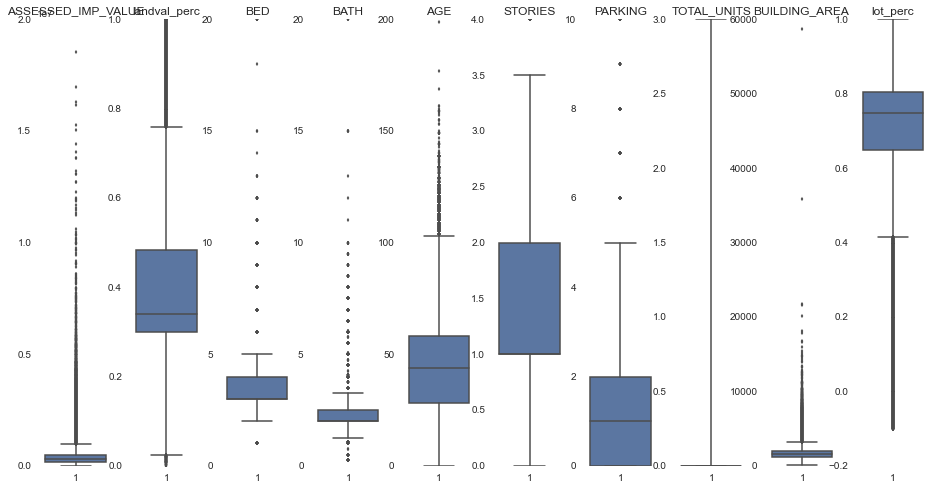

In [4]:
fig = plt.figure(figsize=(16,8))

for i in range(len(X_cont.columns)):
    ax = fig.add_subplot(1, len(X_cont.columns), i+1)
    sns.boxplot(X_cont.iloc[:,i])
    ax.set_title(X_cont.columns[i])

In [5]:
from sklearn.preprocessing import scale

# not scaling dummy variables since it looks weird
X_scaled = scale(X_cont)
X_scaled = pd.DataFrame(X_scaled, columns = X_cont.columns, index = X_cont.index)
X_het = pd.concat([X_scaled, dummies], axis = 1)
X_het.describe().T

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


count          mean       std       min       25%  \
ASSESSED_IMP_VALUE  869044 -1.222089e-13  1.000001 -1.004578 -0.597642   
landval_perc        869044  3.616543e-14  1.000001 -2.489963 -0.606008   
BED                 869044  3.287833e-13  1.000001 -2.434412 -0.280103   
BATH                869044  7.269484e-13  1.000001 -2.367367 -0.115582   
AGE                 869044  4.007911e-12  1.000001 -1.881564 -0.719669   
STORIES             869044 -9.080934e-14  1.000001 -2.770645 -0.658427   
PARKING             869044 -1.373612e-12  1.000001 -1.013395 -1.013395   
TOTAL_UNITS         869044  2.431935e-12  1.000001 -0.343086 -0.343086   
BUILDING_AREA       869044 -4.229520e-13  1.000001 -2.168576 -0.669434   
lot_perc            869044  4.320731e-15  1.000001 -4.302155 -0.259320   
CONDO               869044  5.723185e-02  0.232285  0.000000  0.000000   
COOP                869044  6.904138e-06  0.002628  0.000000  0.000000   
MFR                 869044  1.814408e-02  0.133472  0.000000  0.000000   
MOBILE              869044  6.443862e-05  0.008027  0.000000  0.000000   
SFR                 869044  8.938949e-01  0.307972  0.000000  1.000000   
SFR-PUD             869044  2.140973e-02  0.144746  0.000000  0.000000   
TOWNHOUSE           869044  9.248093e-03  0.095721  0.000000  0.000000   

                         50%       75%        max  
ASSESSED_IMP_VALUE -0.227793  0.281298  48.649153  
landval_perc       -0.350653  0.548740   3.789561  
BED                -0.280103  0.797052  18.031525  
BATH               -0.115582  0.527785  23.045639  
AGE                -0.055729  0.525218   6.376189  
STORIES            -0.658427  1.453791   5.678227  
PARKING            -0.047885  0.917625   8.641703  
TOTAL_UNITS        -0.343086 -0.343086   7.183915  
BUILDING_AREA      -0.222417  0.419488  77.608957  
lot_perc            0.274498  0.582537   1.638763  
CONDO               0.000000  0.000000   1.000000  
COOP                0.000000  0.000000   1.000000  
MFR                 0.000000  0.000000   1.000000  
MOBILE              0.000000  0.000000   1.000000  
SFR                 1.000000  1.000000   1.000000  
SFR-PUD             0.000000  0.000000   1.000000  
TOWNHOUSE           0.000000  0.000000   1.000000

In [6]:
X.describe().T

count           mean            std         min  \
ASSESSED_IMP_VALUE  869044  375230.206046  373518.530637    2.000000   
landval_perc        869044       0.396494       0.159231    0.000015   
BED                 869044       3.260040       0.928372    1.000000   
BATH                869044       2.089826       0.777162    0.250000   
AGE                 869044      45.342996      24.098579    0.000000   
STORIES             869044       1.311723       0.473436    0.000000   
PARKING             869044       1.049596       1.035723    0.000000   
TOTAL_UNITS         869044       0.136742       0.398565    0.000000   
BUILDING_AREA       869044    1717.199303     733.753371  126.000000   
lot_perc            869044       0.696508       0.185115   -0.099885   

                              25%            50%            75%  \
ASSESSED_IMP_VALUE  152000.000000  290145.500000  480300.000000   
landval_perc             0.299999       0.340659       0.483871   
BED                      3.000000       3.000000       4.000000   
BATH                     2.000000       2.000000       2.500000   
AGE                     28.000000      44.000000      58.000000   
STORIES                  1.000000       1.000000       2.000000   
PARKING                  0.000000       1.000000       2.000000   
TOTAL_UNITS              0.000000       0.000000       0.000000   
BUILDING_AREA         1226.000000    1554.000000    2025.000000   
lot_perc                 0.648504       0.747321       0.804344   

                                max  
ASSESSED_IMP_VALUE  18546580.000000  
landval_perc               0.999910  
BED                       20.000000  
BATH                      20.000000  
AGE                      199.000000  
STORIES                    4.000000  
PARKING                   10.000000  
TOTAL_UNITS                3.000000  
BUILDING_AREA          58663.000000  
lot_perc                   0.999867

In [6]:
print len(X_het[X_scaled.STORIES > 5]) | len(X_het[X_scaled.TOTAL_UNITS > 5])
XS = X_het[(X_scaled.STORIES <= 5) & (X_scaled.TOTAL_UNITS <= 5)]
print len(XS)

X_pca = X_scaled[(X_scaled.STORIES <= 5) & (X_scaled.TOTAL_UNITS <= 5)]

2871
866126


- **X:** basef2[metrics]
- **X_cont:** X minus ptype
- **X_dum:** ptype dummies
- **X_scaled:** X_cont scaled
- **X_het:** X_scaled + X_dum
- **XS:** X_het where stories and total_units are less than 5 stdev away
- **X_pca:** X_scaled where stories and total_units are less than 5 stdev away

#PCA

PC1       PC2       PC3       PC4       PC5  \
ASSESSED_IMP_VALUE  0.331210 -0.410668  0.305217 -0.170172  0.086726   
landval_perc       -0.052213 -0.598199  0.499108  0.020727  0.264233   
BED                 0.381523  0.003252 -0.169198 -0.244324 -0.335931   
BATH                0.474446  0.073380 -0.016289 -0.143317  0.022286   
AGE                -0.322274 -0.182244  0.226127 -0.272152 -0.658784   
STORIES             0.320360  0.297951  0.315660  0.157445 -0.084653   
PARKING             0.281045 -0.329647 -0.384821  0.399548  0.171434   
TOTAL_UNITS        -0.035964  0.339905  0.172813 -0.571718  0.531425   
BUILDING_AREA       0.461836 -0.054894  0.026707 -0.251543 -0.211136   
lot_perc           -0.129818 -0.344835 -0.547175 -0.491679  0.108491   

                         PC6       PC7       PC8       PC9      PC10  
ASSESSED_IMP_VALUE -0.552182 -0.026669 -0.033076 -0.456640  0.277097  
landval_perc        0.461476  0.066000  0.191181  0.211562 -0.146458  
BED                 0.535046  0.355458  0.185536 -0.447922  0.074670  
BATH               -0.019867  0.120107  0.071117  0.662903  0.537491  
AGE                 0.099880 -0.172284 -0.445602  0.117222  0.227530  
STORIES             0.229022 -0.761570  0.168653 -0.121278  0.037502  
PARKING             0.234914 -0.160802 -0.620407 -0.054944  0.079157  
TOTAL_UNITS         0.207813 -0.002818 -0.433850 -0.110784  0.018448  
BUILDING_AREA      -0.185753 -0.016106 -0.180826  0.245540 -0.739850  
lot_perc            0.012822 -0.467291  0.300067  0.051150  0.011593

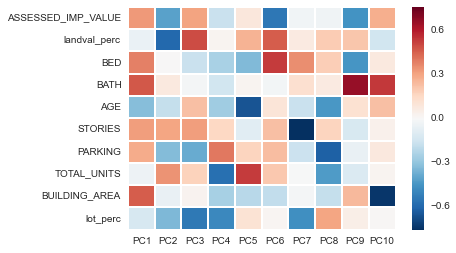

In [7]:
from sklearn.decomposition import PCA

pca = PCA(whiten = True)
pca.fit(X_pca)

# check out the loadings
loadings = pd.DataFrame(pca.components_, index = map('PC{}'.format, range(1,len(X_scaled.columns)+1)), columns = X_scaled.columns).T
sns.heatmap(loadings)
loadings

PC1       PC2       PC3       PC4       PC5  \
Variance Ratio             0.350604  0.139061  0.120025  0.110880  0.078382   
Cumulative Variance Ratio  0.350604  0.489664  0.609689  0.720569  0.798951   

                                PC6       PC7       PC8       PC9      PC10  
Variance Ratio             0.057682  0.052385  0.042904  0.028765  0.019314  
Cumulative Variance Ratio  0.856633  0.909018  0.951922  0.980686  1.000000

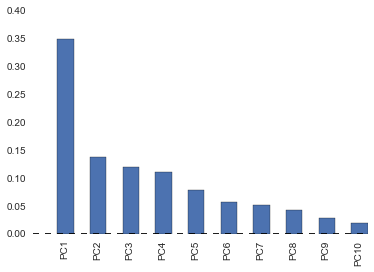

In [8]:
p = pd.DataFrame([pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()],
             index = ['Variance Ratio', 'Cumulative Variance Ratio'],
             columns = map('PC{}'.format, range(1, len(pca.components_)+1)))
p.T['Variance Ratio'].plot(kind = 'bar')
p

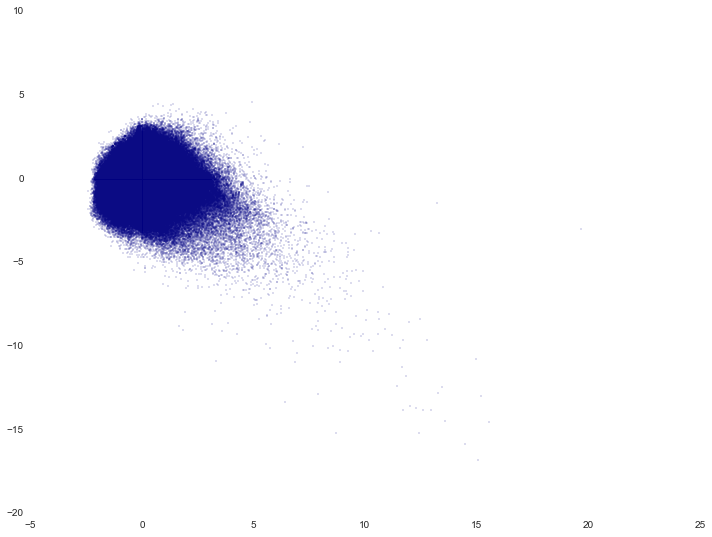

In [9]:
pca2 = PCA(2, whiten=True)
X_pca2 = pca2.fit_transform(X_pca)
plt.figure(figsize=(12,9))
plt.scatter(X_pca2[:,0], X_pca2[:,1], s=2, alpha=.2)

PCA doesn't help dimensionality reduction much (7 of 10 components required for 90% variance), and PC1 being the most important with others being a clump.

#KMeans

### Hyperparameter tuning
Beware, do not run below http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [11]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

results = {}
for i in range(2, 50, 1):
    kmeans = MiniBatchKMeans(i)
    kmeans.fit(XS)
    score = metrics.silhouette_score(XS.values, kmeans.labels_, metric='euclidean', sample_size=1000)
    results[i] = score

results

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


{2: 0.25242743380730231,
 3: 0.16347858977142085,
 4: 0.16746956322086168,
 5: 0.19478278483075342,
 6: 0.15259273501396595,
 7: 0.1940187046313977,
 8: 0.16751316369489172,
 9: 0.18273991749125662,
 10: 0.18947641824770364,
 11: 0.18039901268980266,
 12: 0.19103262107231261,
 13: 0.18279654494213038,
 14: 0.18285817530498649,
 15: 0.19385523286982539,
 16: 0.15564544808067385,
 17: 0.14577435566505106,
 18: 0.15559801050769681,
 19: 0.1557692970562308,
 20: 0.15897514265464752,
 21: 0.18280913074776048,
 22: 0.16007390850548067,
 23: 0.14913553358697096,
 24: 0.17675468699342553,
 25: 0.16598267832100264,
 26: 0.16783759664885112,
 27: 0.17059334180531968,
 28: 0.15480799218357788,
 29: 0.17127621666205387,
 30: 0.14145241944788914,
 31: 0.1428401974600336,
 32: 0.15840993643760889,
 33: 0.14801774228848552,
 34: 0.15016464930851742,
 35: 0.15007684235329122,
 36: 0.13449312133830296,
 37: 0.11972712236252719,
 38: 0.1516240088690459,
 39: 0.15670406916298762,
 40: 0.13022688448353684

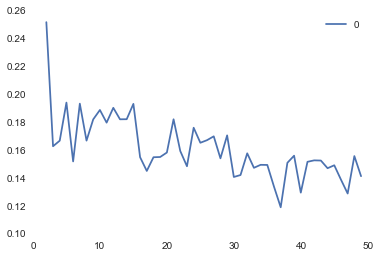

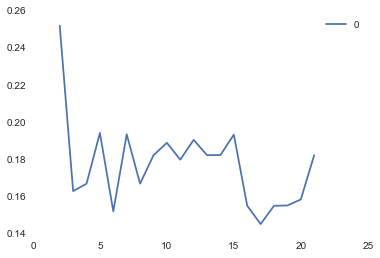

In [20]:
results_df = pd.DataFrame.from_dict(results, orient = 'index').sort()
results_df.plot()
results_df[0:20].plot()

5, 7, 15 all look appropriate

### Fitting KMeans
Starting with 8 (instead of a high number) for visualization purposes

In [10]:
from sklearn.cluster import MiniBatchKMeans

km5 = MiniBatchKMeans(5, verbose = 1) # tends to converge in the 20s, varying max_iter does not matter
km5.fit(XS)
fh5 = km5.labels_
fh5_df = pd.Series(fh5, name = 'fh', index = XS.index)
X5 = XS.join(fh5_df)
X5 = X5.join(base[['FIDELITY_LATITUDE', 'FIDELITY_LONGITUDE']])
X5.head()

Init 1/3 with method: k-means++
Inertia for init 1/3: 1767.105789
Init 2/3 with method: k-means++
Inertia for init 2/3: 1638.361424
Init 3/3 with method: k-means++
Inertia for init 3/3: 1866.375901
Minibatch iteration 1/866200: mean batch inertia: 6.056674, ewa inertia: 6.056674 
Minibatch iteration 2/866200: mean batch inertia: 5.867216, ewa inertia: 6.056630 
Minibatch iteration 3/866200: mean batch inertia: 6.707451, ewa inertia: 6.056780 
Minibatch iteration 4/866200: mean batch inertia: 5.112875, ewa inertia: 6.056562 
Minibatch iteration 5/866200: mean batch inertia: 5.445759, ewa inertia: 6.056421 
Minibatch iteration 6/866200: mean batch inertia: 5.754557, ewa inertia: 6.056352 
Minibatch iteration 7/866200: mean batch inertia: 6.234032, ewa inertia: 6.056393 
Minibatch iteration 8/866200: mean batch inertia: 5.389922, ewa inertia: 6.056239 
Minibatch iteration 9/866200: mean batch inertia: 4.883927, ewa inertia: 6.055968 
Minibatch iteration 10/866200: mean batch inertia: 6.14

ASSESSED_IMP_VALUE  landval_perc       BED      BATH       AGE   STORIES  \
0           -0.838977     -0.920036 -1.357258 -1.402316  3.056489  1.453791   
1           -0.201410     -0.606001 -1.357258 -2.045683  3.056489  1.453791   
2           -0.620955     -1.723638  0.797052 -0.115582  3.056489  1.453791   
3           -0.781338     -0.434721  0.797052 -0.758949  3.056489  1.453791   
4           -0.854400     -0.453274  0.797052 -0.115582  3.471452  1.453791   

    PARKING  TOTAL_UNITS  BUILDING_AREA  lot_perc  CONDO  COOP  MFR  MOBILE  \
0 -1.013395    -0.343086      -1.560742  0.403491      0     0    0       0   
1 -1.013395    -0.343086      -1.560742  0.403491      0     0    0       0   
2 -1.013395    -0.343086      -0.061600 -1.973411      0     0    0       0   
3 -1.013395    -0.343086      -0.781188 -0.832498      0     0    0       0   
4 -1.013395     2.165914      -0.167903 -1.804867      0     0    1       0   

   SFR  SFR-PUD  TOWNHOUSE  fh  FIDELITY_LATITUDE  FIDELITY_LONGITUDE  
0    1        0          0   2          37.803152         -122.296821  
1    1        0          0   2          37.803141         -122.296767  
2    1        0          0   2          37.803136         -122.296740  
3    1        0          0   2          37.803125         -122.296685  
4    0        0          0   3          37.803093         -122.296523

# Visualization

In [11]:
# This cell initializes the map projections
from mpl_toolkits.basemap import Basemap

bayarea  = Basemap(projection='merc', lat_0=((37.2056+38.385)/2), lon_0 = ((-122.791-121.667)/2),
                   llcrnrlat = 37.205572, llcrnrlon = -122.791252,
                   urcrnrlat = 38.385387, urcrnrlon = -121.667213,
                   resolution = 'h', area_thresh = 0.001)

# northbay = Basemap()

# southbay = Basemap()

eastbay = Basemap(projection='merc', lat_0=((37.796+37.9026)/2), lon_0=((-122.318-122.204)/2),
                  llcrnrlat = 37.796372, llcrnrlon = -122.318089,
                  urcrnrlat = 37.902642, urcrnrlon = -122.204105,
                  resolution = 'h', area_thresh = 0.001)

sf = Basemap(projection='merc', lat_0=((37.7077+37.8339)/2), lon_0=((-122.511243-122.361039)/2),
             llcrnrlat = 37.707739, llcrnrlon = -122.511243,
             urcrnrlat = 37.833933, urcrnrlon = -122.361039,
             resolution = 'h', area_thresh = 0.001)

In [12]:
import numpy as np
def plot_pts(df, proj, markersize, alpha, fillcolor, bcolor, cmap):
    # df represents dataframe
    # proj represents what map, with eastbay, sf and bayarea as possible values
    plt.figure(figsize=(16,16))
    proj.drawcoastlines(color=bcolor)
    proj.drawmapboundary(color='gray', fill_color = 'lightblue')
    proj.fillcontinents(color = fillcolor)
    
    k = df.fh.max() + 1
    # k denotes how many clusters / colors of dots
    
    color_list = cmap(np.linspace(0, 1, k))
    
    for i in range(k):
        lat = df.FIDELITY_LATITUDE[df.fh == i].tolist()
        lon = df.FIDELITY_LONGITUDE[df.fh == i].tolist()
        x,y = proj(lon,lat)
        
        proj.plot(x, y, marker = 'o', markersize=markersize, linestyle = 'None',
                  markerfacecolor = (color_list[i][0], color_list[i][1], color_list[i][2]),
                  alpha = alpha, label = i)
        
    plt.legend(loc = "upper right")
    
# This function returns the points in dataframe df (must contain lat/long) on a proj (sf, bayarea, eastbay)
# with markersize 1-10, alpha .1/.2/.5/1, fillcolor white/none for the land, bcolor for the coastline,
# cmap (e.g. plt.cm.Paired) for color-scheme of points

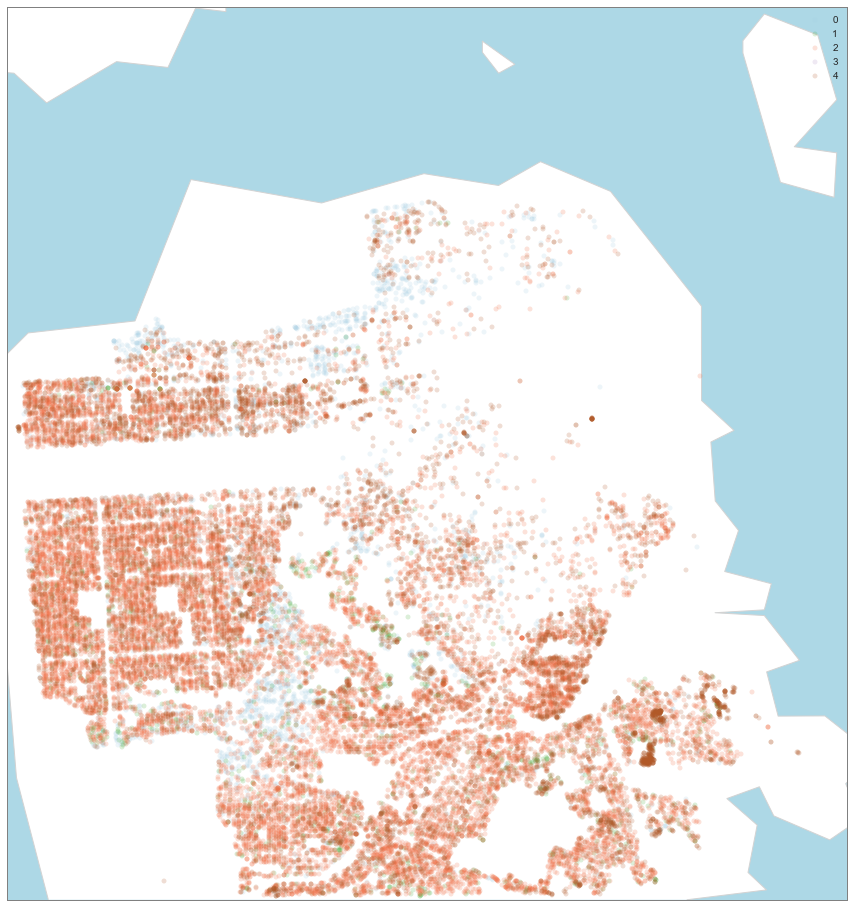

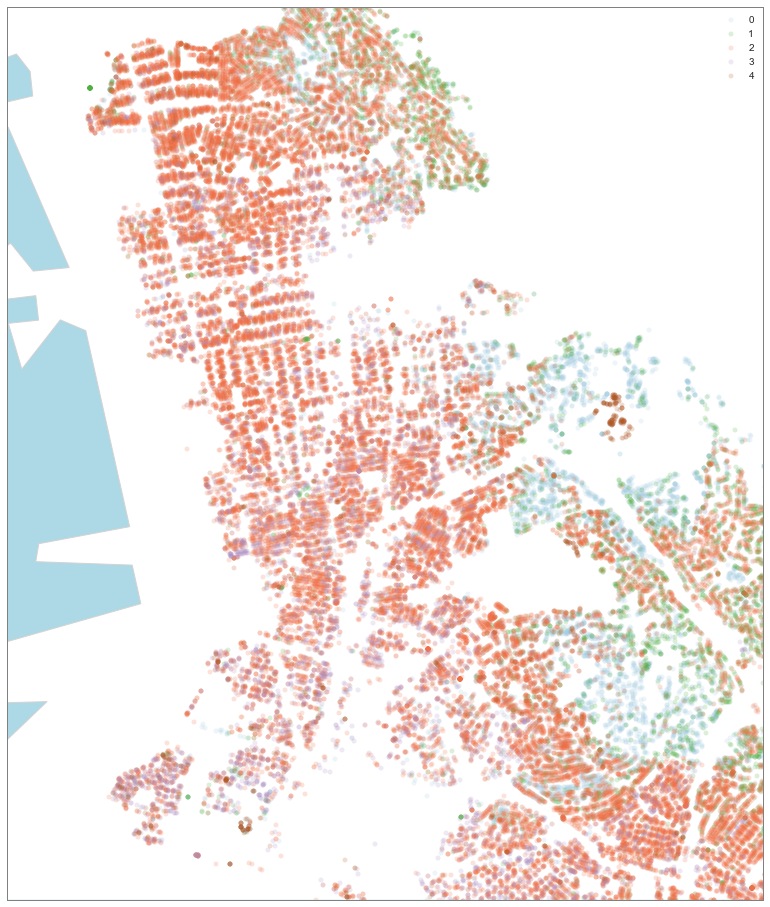

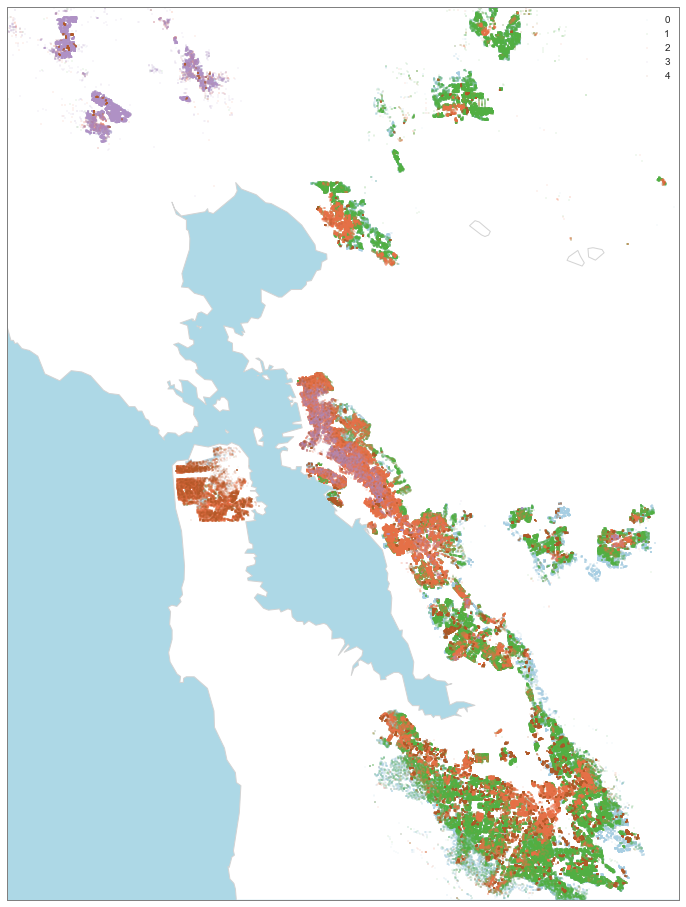

In [13]:
plot_pts(X5, sf, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X5, eastbay, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X5, bayarea, 2, .1, 'white', 'lightgray', plt.cm.Paired)

# Drawing the Decision Boundaries in the Mesh Grid
## Using SVC rbf kernel
### Investigation

In [ ]:
# Focusing only on SF for visualization
X_sf = X5[(X5.FIDELITY_LATITUDE > 37.7078) &
          (X5.FIDELITY_LATITUDE < 37.834) &
          (X5.FIDELITY_LONGITUDE > -122.51) &
          (X5.FIDELITY_LONGITUDE < -122.36)]

## Using kNN
### Investigation

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

knn_params = {
    'n_neighbors' : [1, 9, 49, 99, 199, 299],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'haversine'],
    'weights' : ['uniform', 'distance']
    }

knn_test1 = GridSearchCV(KNeighborsClassifier(), knn_params, 
                         cv=2,
                         # cv=ShuffleSplit(len(X_sf), test_size=0.2, n_iter=1, random_state=0), # hack for cv=1/leave-p-out
                         refit=False, n_jobs=1)
knn_test1.fit(X5[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X5.fh)

print knn_test1.best_score_
print knn_test1.best_params_
knn_test1.grid_scores_

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[CV] n_neighbors=1, metric=minkowski, weights=uniform ................
[CV]  n_neighbors=1, metric=minkowski, weights=uniform, score=0.249272 -   3.1s
[CV] n_neighbors=1, metric=minkowski, weights=uniform ................
[CV]  n_neighbors=1, metric=minkowski, weights=uniform, score=0.180118 -   5.8s
[CV] n_neighbors=1, metric=minkowski, weights=distance ...............
[CV]  n_neighbors=1, metric=minkowski, weights=distance, score=0.249272 -   3.3s
[CV] n_neighbors=1, metric=minkowski, weights=distance ...............
[CV]  n_neighbors=1, metric=minkowski, weights=distance, score=0.180118 -   5.3s
[CV] n_neighbors=9, metric=minkowski, weights=uniform ................
[CV]  n_neighbors=9, metric=minkowski, weights=uniform, score=0.247018 -   3.7s
[CV] n_neighbors=9, metric=minkowski, weights=uniform ................
[CV]  n_neighbors=9, metric=minkowski, weights=uniform, score=0.325966 -   7.5s
[CV] n_neighbors=9, metric=min

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed: 11.0min



[CV] n_neighbors=49, metric=euclidean, weights=uniform ...............
[CV]  n_neighbors=49, metric=euclidean, weights=uniform, score=0.238491 -   7.2s
[CV] n_neighbors=49, metric=euclidean, weights=uniform ...............
[CV]  n_neighbors=49, metric=euclidean, weights=uniform, score=0.311055 -  19.1s
[CV] n_neighbors=49, metric=euclidean, weights=distance ..............
[CV]  n_neighbors=49, metric=euclidean, weights=distance, score=0.246042 -   8.5s
[CV] n_neighbors=49, metric=euclidean, weights=distance ..............
[CV]  n_neighbors=49, metric=euclidean, weights=distance, score=0.312360 -  20.3s
[CV] n_neighbors=99, metric=euclidean, weights=uniform ...............
[CV]  n_neighbors=99, metric=euclidean, weights=uniform, score=0.224618 -  12.5s
[CV] n_neighbors=99, metric=euclidean, weights=uniform ...............
[CV]  n_neighbors=99, metric=euclidean, weights=uniform, score=0.332694 -  31.1s
[CV] n_neighbors=99, metric=euclidean, weights=distance ..............
[CV]  n_neighb

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 73.7min finished


[mean: 0.21470, std: 0.03458, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.21470, std: 0.03458, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.28649, std: 0.03947, params: {'n_neighbors': 9, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.28722, std: 0.03642, params: {'n_neighbors': 9, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.27477, std: 0.03628, params: {'n_neighbors': 49, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.27920, std: 0.03316, params: {'n_neighbors': 49, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.27866, std: 0.05404, params: {'n_neighbors': 99, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.28588, std: 0.04712, params: {'n_neighbors': 99, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.25602, std: 0.03618, params: {'n_neighbors': 199, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.26256, std: 0.03171, params: {'n_neighbors': 199, 'met

(0, 250)

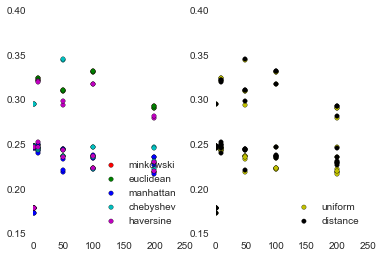

In [27]:
score1 = [x[2][0] for x in knn_test1.grid_scores_]
score2 = [x[2][1] for x in knn_test1.grid_scores_]
setting = [x[0] for x in knn_test1.grid_scores_]
distmetric = [x['metric'] for x in setting]
weights = [x['weights'] for x in setting]
n_neighbors = [x['n_neighbors'] for x in setting]

knn_df = pd.DataFrame(zip(score1, score2, distmetric, weights, n_neighbors), 
                      columns = ['score1', 'score2', 'distmetric', 'weights', 'n_neighbors'])

import numpy as np
from itertools import cycle

colors = cycle('rgbcmykw')
distmetric_ids = knn_df.distmetric.unique()
fig = plt.figure()
ax1 = fig.add_subplot(121)

for label, c in zip(distmetric_ids, colors):
    ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score1'],
    c=c, label=label, marker = 'o')
    ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score2'],
    c=c)
ax1.legend(loc = 'lower right')
ax1.set_xlim(0,250)

ax2 = fig.add_subplot(122)

weights_ids = knn_df.weights.unique()
for label, c in zip(weights_ids, colors):
    ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score1'],
    c=c, label=label, marker = 'o')
    ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score2'],
    c=c)
    
ax2.legend(loc = 'lower right')
ax2.set_xlim(0,250)

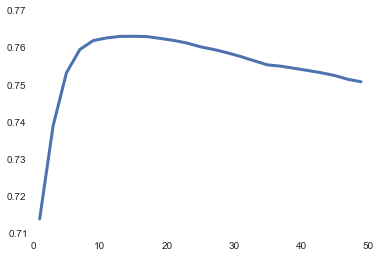

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X5[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']],
                                                    X5.fh, test_size = 0.3, random_state = 38)

n_neighbors = range(1,50,2)

scores = []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, scores, linewidth=3)

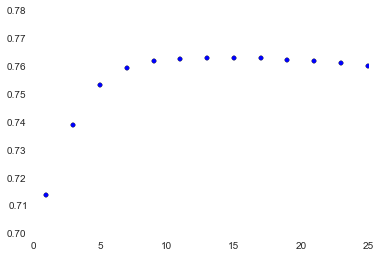

In [17]:
import matplotlib.pyplot as plt

plt.scatter(n_neighbors, scores)
plt.grid(b=True, which='major', axis='x')
plt.xlim(0,25)
ax = plt.gca()
ax.xaxis.grid(True)

## Fitting kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_f = KNeighborsClassifier(15, metric = 'euclidean')
knn_f.fit(X_train, y_train)
test_df = pd.concat([X_test, y_test], names = ['FIDELITY_LATITUDE', 'FIDELITY_LONGITUDE', 'fh'], axis=1)
train_df = pd.concat([X_train, y_train], names = ['FIDELITY_LATITUDE', 'FIDELITY_LONGITUDE', 'fh'], axis=1)
test_df.head()

FIDELITY_LONGITUDE  FIDELITY_LATITUDE  fh
921983          -122.070197          37.364162   0
1134555         -121.830539          37.290019   4
290323          -122.054380          37.561161   0
228718          -122.087015          37.645748   1
259306          -121.921126          37.538026   2

## Visualization

In [33]:
def plot_full(CLF, **kwargs):
    plt.figure(figsize=(16,16))    
    h = .002
    y_min, y_max = 37.205572, 38.385387
    x_min, x_max = -122.791252, -121.667213
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = CLF.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    kwargs['proj'].contourf(xx, yy, Z, latlon = True, cmap=plt.cm.Paired, alpha=0.3)
    
    plot_pts2(**kwargs)
    # This function plots the decision surfaces after accepting a classifier, then plots points
    
def plot_pts2(df, proj, markersize, alpha, fillcolor, bcolor, cmap):
    # df represents dataframe
    # proj represents what map, with eastbay, sf and bayarea as possible values
    plt.gca()
    proj.drawcoastlines(color=bcolor)
    proj.drawmapboundary(color='gray', fill_color = 'lightblue')
    proj.fillcontinents(color = fillcolor)
    
    k = df.fh.max() + 1
    # k denotes how many clusters / colors of dots
    
    color_list = cmap(np.linspace(0, 1, k))
    
    for i in range(k):
        lat = df.FIDELITY_LATITUDE[df.fh == i].tolist()
        lon = df.FIDELITY_LONGITUDE[df.fh == i].tolist()
        x,y = proj(lon,lat)
        
        proj.plot(x, y, marker = 'o', markersize=markersize, linestyle = 'None',
                  markerfacecolor = (color_list[i][0], color_list[i][1], color_list[i][2]),
                  alpha = alpha, label = i)
        
    plt.legend(loc = "upper right")
    # Only difference from plot_pts is to reference the current figure instead of creating one, so I can overlay on the surfaces

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


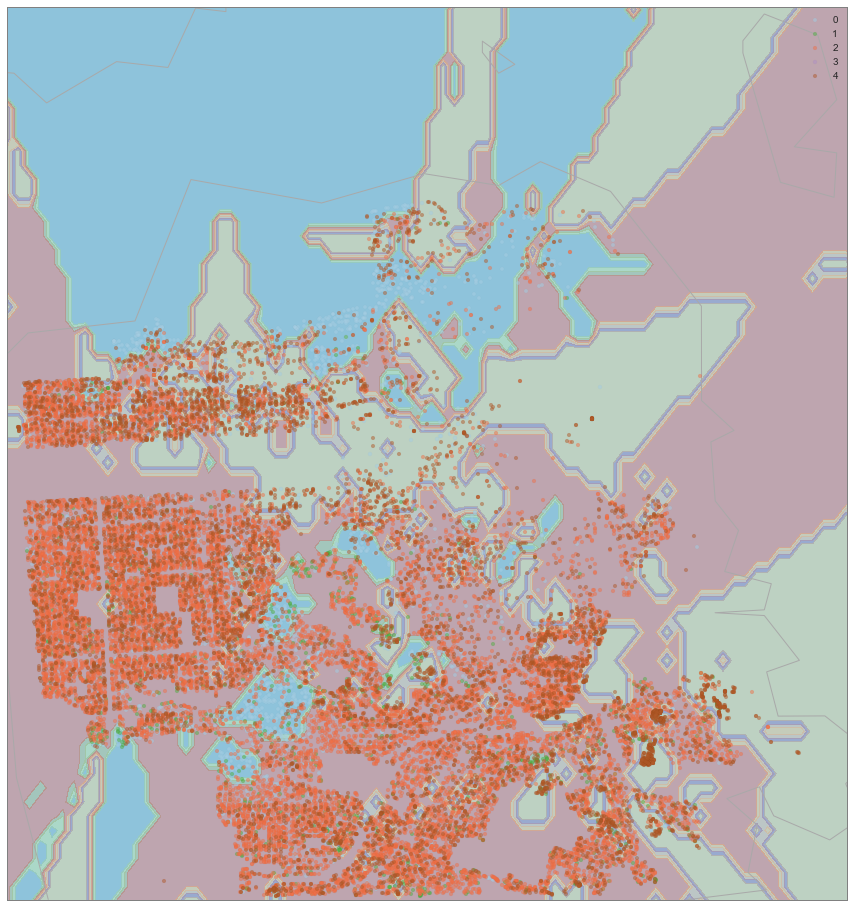

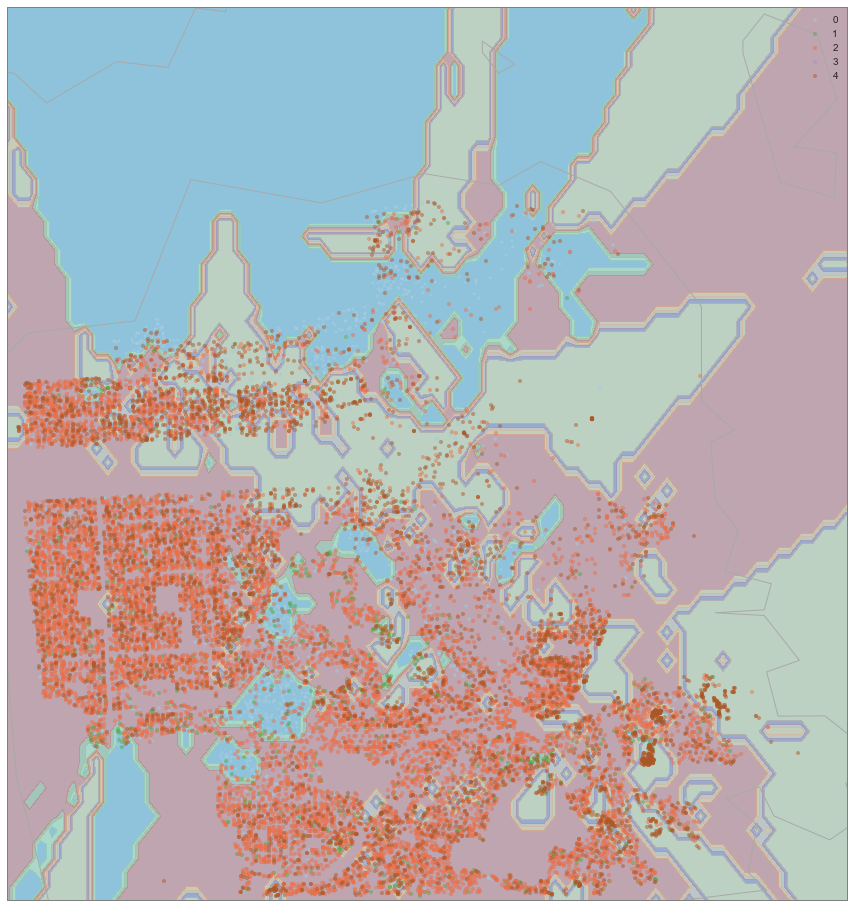

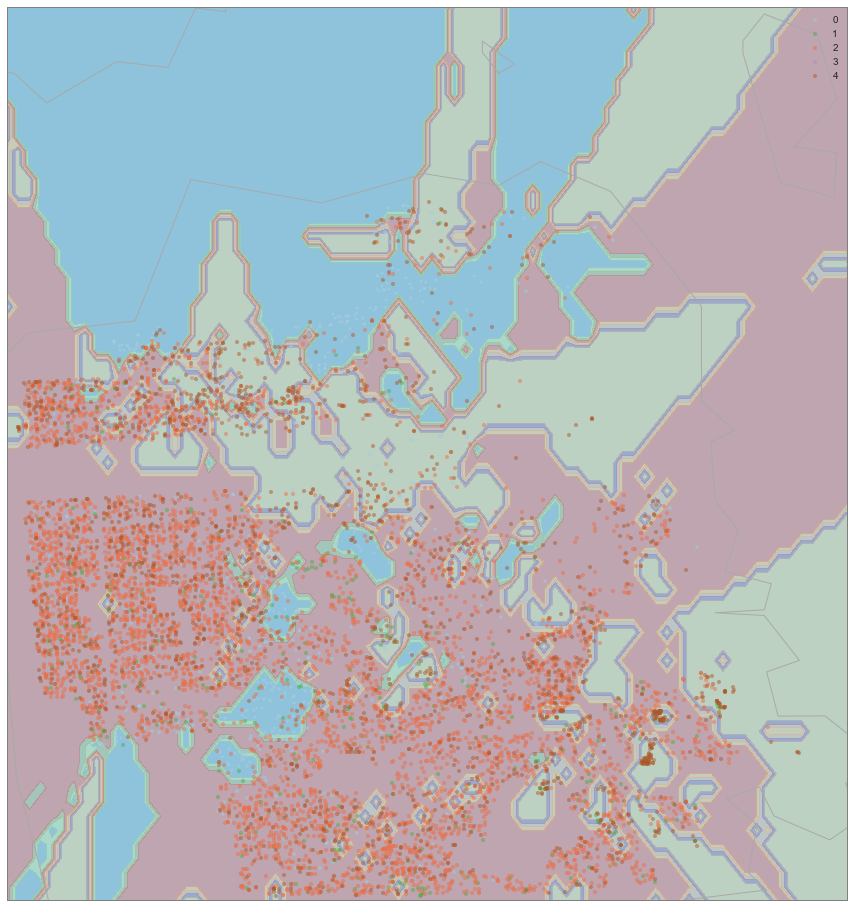

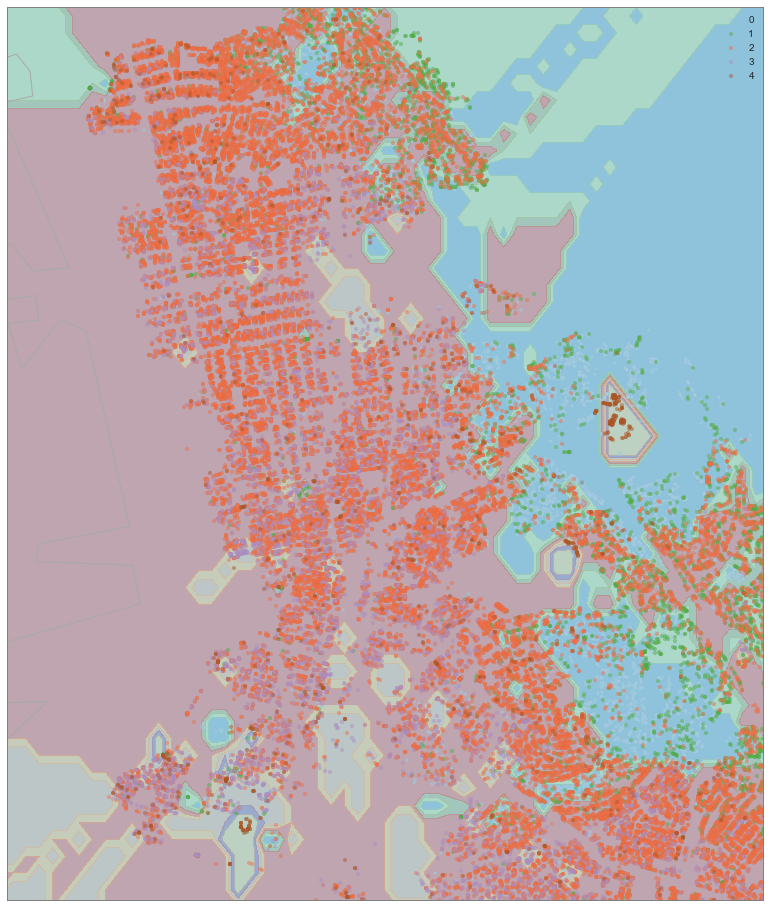

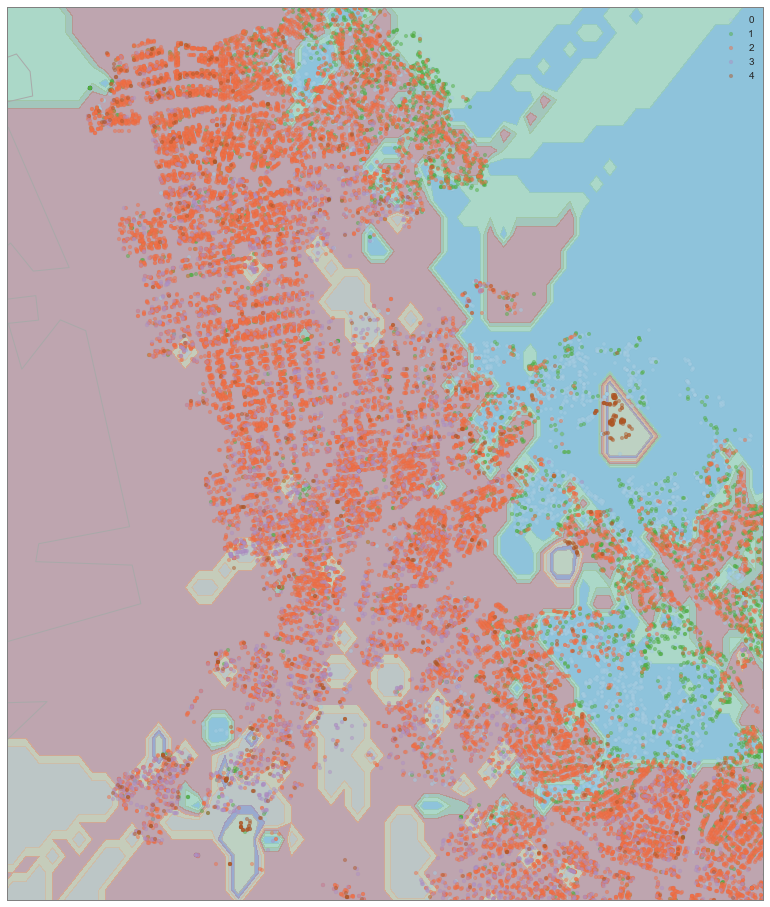

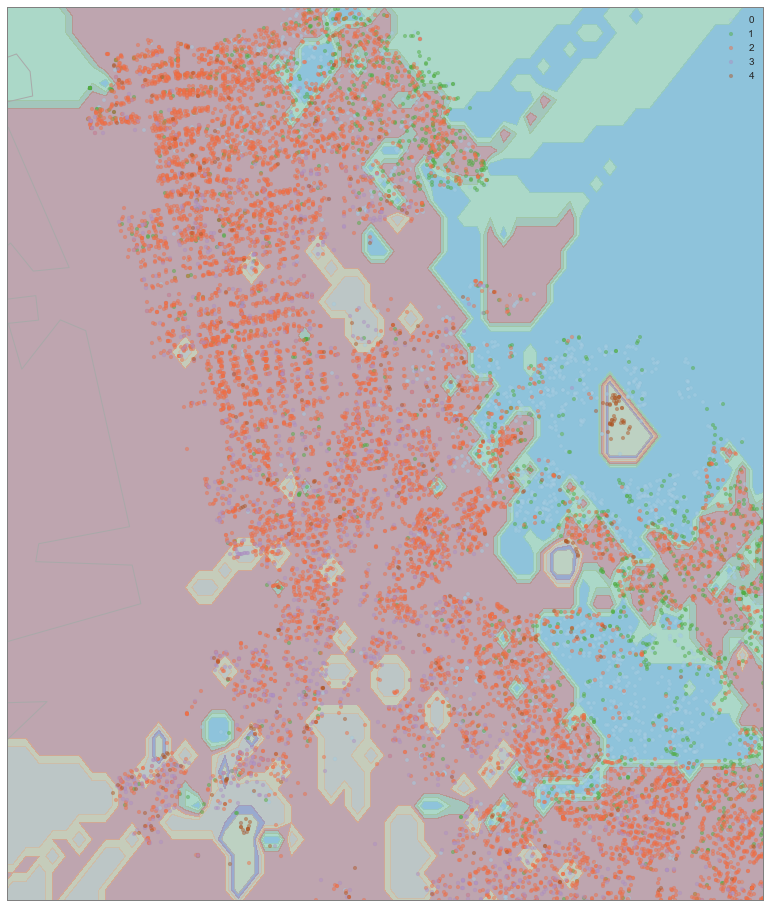

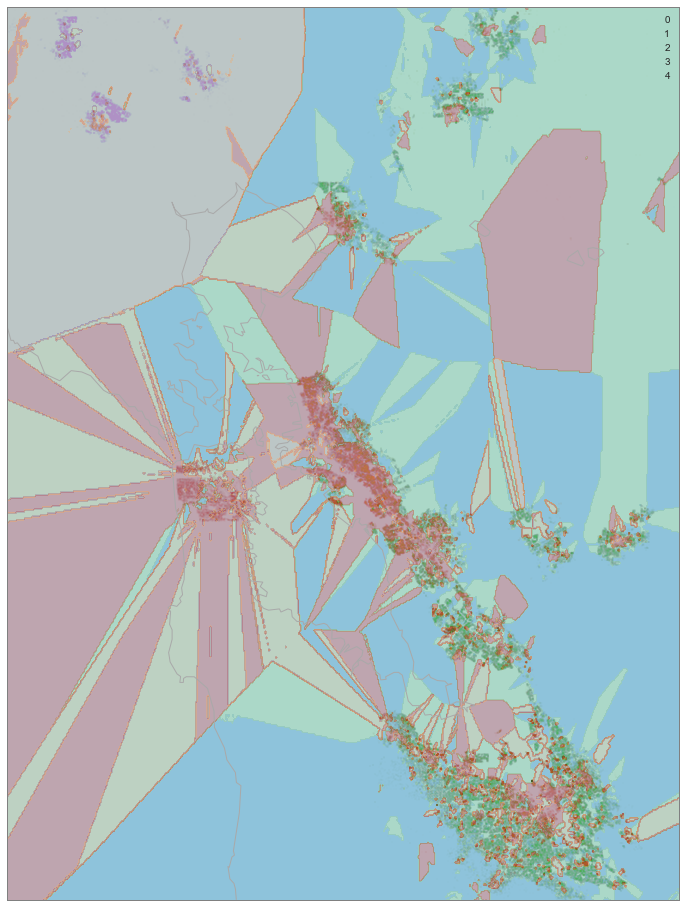

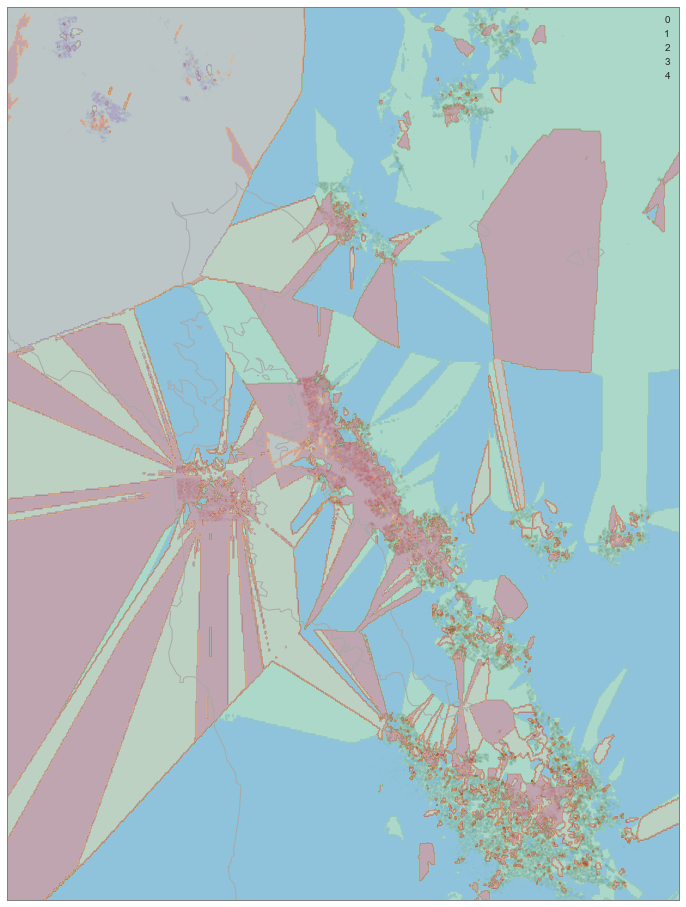

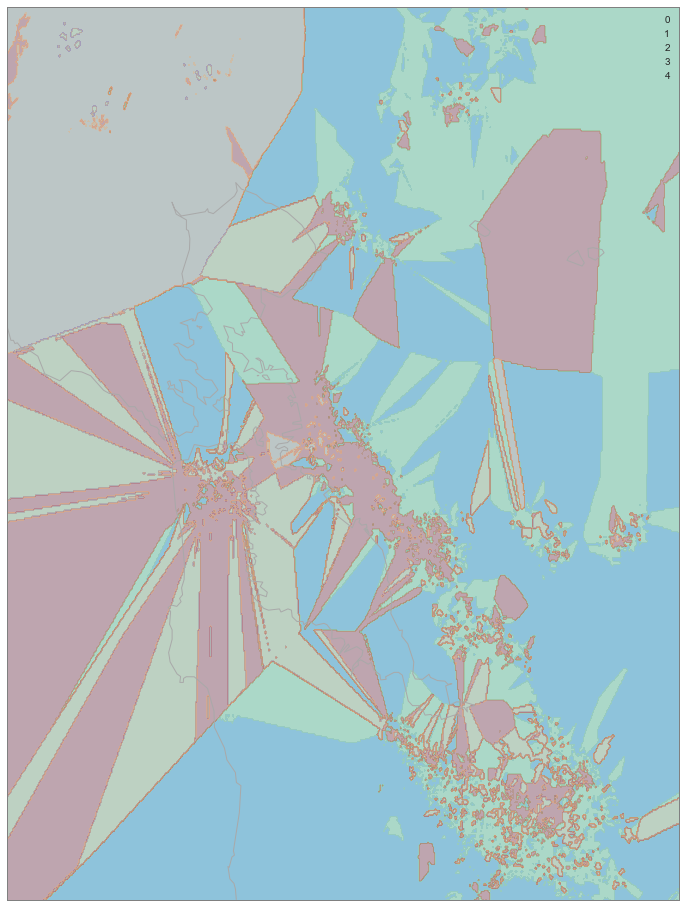

In [34]:
plot_full(knn_f, df=X5, proj=sf, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=train_df, proj=sf, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=test_df, proj=sf, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)

plot_full(knn_f, df=X5, proj=eastbay, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=train_df, proj=eastbay, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=test_df, proj=eastbay, markersize=4, alpha=.5, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)

plot_full(knn_f, df=train_df, proj=bayarea, markersize=2, alpha=.01, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=test_df, proj=bayarea, markersize=2, alpha=.01, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)
plot_full(knn_f, df=test_df, proj=bayarea, markersize=2, alpha=0, fillcolor='None', bcolor='darkgray', cmap=plt.cm.Paired)

In [71]:
centroids = pd.DataFrame(km5.cluster_centers_, columns=X_het.columns)
centroids = centroids.apply(lambda x: x/centroids.max().max())
centroids

ASSESSED_IMP_VALUE  landval_perc       BED      BATH       AGE   STORIES  \
0            0.350056     -0.003115  0.346230  0.418879 -0.258816  0.411618   
1           -0.082246     -0.032605  0.041912 -0.031618 -0.023029 -0.218305   
2           -0.143163      0.133986 -0.328543 -0.447167  0.455642 -0.167546   
3           -0.077242     -0.097911 -0.009939  0.085041 -0.111645  0.037586   
4           -0.022428      0.037796 -0.319852 -0.034735 -0.246946  0.257527   

    PARKING  TOTAL_UNITS  BUILDING_AREA  lot_perc     CONDO  COOP       MFR  \
0  0.305492    -0.127694       0.446646 -0.090075  0.006557     0  0.000437   
1  0.110417    -0.131446      -0.086074  0.157809  0.006504     0  0.000000   
2 -0.305130    -0.085779      -0.271512  0.096345  0.013019     0  0.000449   
3 -0.387473     1.000000       0.008608  0.084156  0.000000     0  0.055192   
4 -0.030724    -0.102752      -0.180792 -0.993423  0.235165     0  0.004031   

   MOBILE       SFR   SFR-PUD  TOWNHOUSE  
0       0  0.378532  0.011802   0.000437  
1       0  0.387257  0.003252   0.000750  
2       0  0.383398  0.000449   0.000449  
3       0  0.318782  0.023790   0.000000  
4       0  0.069877  0.032251   0.056440

In [60]:
# http://matplotlib.org/examples/api/radar_chart.html
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

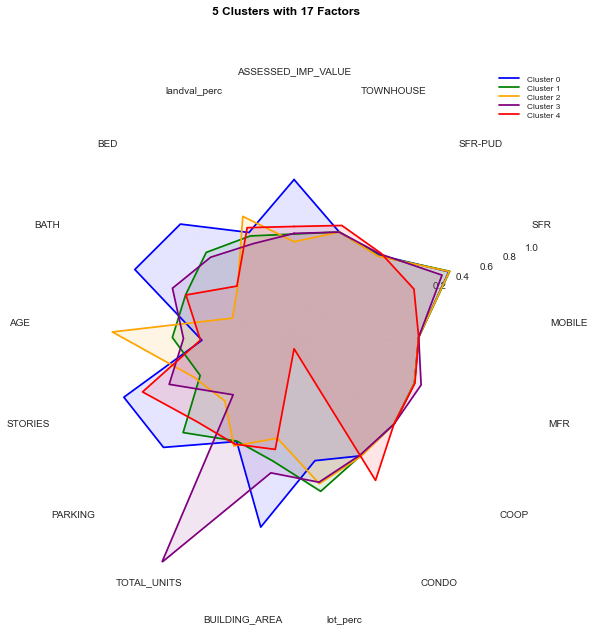

In [89]:
N = 17
theta = radar_factory(17, frame='polygon')

data = centroids
spoke_labels = centroids.columns

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'g', 'orange', 'purple', 'r']
    
ax = fig.add_subplot(111, projection='radar')
ax.set_rgrids((0.2, 0.4, 0.6, 0.8, 1.0))
    # ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #              horizontalalignment='center', verticalalignment='center')
for d, color in zip(range(17), colors):
    ax.plot(theta, data.iloc[d].values, color=color)
    ax.fill(theta, data.iloc[d].values, facecolor=color, alpha=0.1)
ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
labels = ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4')
legend = plt.legend(labels, loc=(0.9, .95), labelspacing=0.1)
plt.setp(legend.get_texts(), fontsize='small')

plt.figtext(0.5, 0.965, '5 Clusters with 17 Factors',
            ha='center', color='black', weight='bold', size='large')

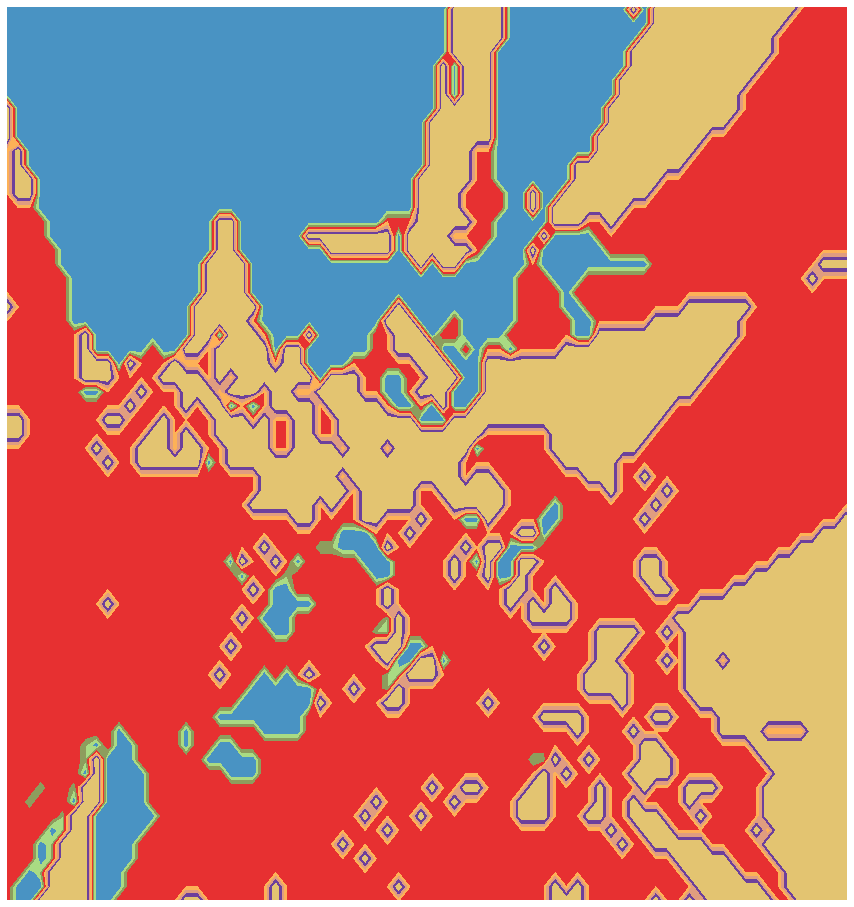

In [41]:
def plot_contour(CLF, proj):
    plt.figure(figsize=(16,16))    
    h = .002
    y_min, y_max = 37.205572, 38.385387
    x_min, x_max = -122.791252, -121.667213
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = CLF.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    proj.contourf(xx, yy, Z, latlon = True, cmap=plt.cm.Paired, alpha=1)
    plt.legend(loc='upper left')
    
plot_contour(knn_f, sf)

# What's Next
 - ~~Try kNN~~ Faster than SVM, good
 - ~~Infinite iterations on EC2~~ not needed for kNN
 - ~~Try different values for k-means~~ optimized using silhouette score
 - Try DBSCAN, Birch
 - ~~Refine gridsearch~~
 - Build via zipcode
 - ~~Check out clusters in PCA~~ does not look separable
 - Build via tileplots and hexbins
 - ~~Analyze cluster attributes~~ used spider plot
 - Cluster neighborhoods instead